# Milestone 1: Exploring Instacart Online Grocery Shopping Dataset
**By: Tanner Martz**

[Link to my GitHub webpage](https://cur8tor.github.io/tmartzDS/)

## Project Overview:
### Objective:
The overarching objective of the project is to leverage the Instacart dataset to gain insights into food purchasing behaviors – aiming to understand historical trends and predict future purchase behavior. This may inform an online food grocery store focused on essentials, potentially leading to a food package delivery system that caters to the general public.

### Project Introduction:
The Instacart dataset provides a detailed account of user purchase behaviors over time, offering rich information about food products, order sequence, and purchase timings. Through a deep dive into this dataset, we aim to:
- Understand the essentials: What food products are most frequently bought by users?
- Predict future purchases: Based on historical data, can we forecast future buying behaviors?
- Inform a minimalist online food grocery store: If one were to create an 'essentials-only' store, what products should it carry?
- Explore the feasibility of a universal food package: Can we curate a food package that caters to the broadest demographic? How often should it be delivered to be most effective?

### Project Dataset
This is a study of the Instacart dataset, made public with the goal to predict costomer reordering (jeremy stanley, Meg Risdal, sharathrao, Will Cukierski. (2017). Instacart Market Basket Analysis. Kaggle. https://kaggle.com/competitions/instacart-market-basket-analysis). Instacart is challenging the Kaggle community to use this anonym
ized data on customer orders over time to predict which previously purchased products will be in a user’s next order. Here is the link to the data set: https://www.kaggle.com/competitions/instacart-market-basket-analysis/data.

### ETL (Extraction, Transform, Load) Process:
- Extraction: CSV files were obtained directly from the Instacart competition page.
- Transform: Data will undergo processes to handle missing values, ensure data tidiness, and merge tables for enriched information.
- Load: Data frames, post transformation, will be structured for further analysis.

### Initial Analysis and Observations:
- Understand the top products and categories from the dataset – are there patterns that highlight essential products?
- Explore purchase frequencies – which products are consistently being bought over time?

### Deeper Analysis and Study Objectives:
- Essentials Identification: Through product frequency and popularity, determine a list of 'essential' food products.
- Predictive Analysis: Using past purchase data, attempt to predict future buying patterns.
- Online Grocery Store Blueprint: Based on the essential products identified, create a hypothetical inventory list for an online food grocery store focusing on essentials.
- Universal Food Package Design: Curate a universally appealing food package based on the most commonly bought items. Analyze order frequencies to determine optimal delivery schedules – weekly, bi-weekly, or monthly.

### Collaboration Plan:
This project is structured as an individual endeavor. Git will be employed for version control, and all data, analysis, and findings will be hosted on GitHub. A systematic schedule will be adhered to, ensuring dedicated time slots for consistent project progress.

The project will be worked on as a git respository with a .ipynb file to html file hosting project on github pages for public viewing of the findings. The data is from a Kaggle dataset from 2017, while a bit dated, it has over 2 million data points which is quite extensive and sufficient for priliminary understanding.

### Next Steps:
- Proceed with a comprehensive Exploratory Data Analysis (EDA) of the Instacart dataset.
- Correlate findings with external data sources, such as nutritional databases, to add depth to the analysis.
- Design preliminary models for predictive analysis and test their efficacy.

### Website/GitHub IO Page:
Progress, including this Milestone 1 document and subsequent findings, will be updated on the GitHub IO page to ensure transparency and ease of reference.

## Preliminary Dataset View 
Following is a preliminary view of the dataset, showcasing the following:
- 'Orders distribution across days of the week'
- 'Orders Distribution Across Hours of the Day'
- 'Top 10 Most Ordered Products'
- 'Heatmap of Day of Week Vs Hour of Day'
- 'Reorder ratio across different departments'

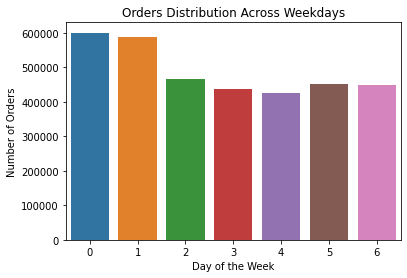

In [1]:
import pandas as pd                 # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt     # Import the matplotlib library for data visualization
import seaborn as sns               # Import the seaborn library for statistical data visualization

root = 'input/'                     # Set the root directory for the data

# Load all the data from csv files into dataframes
orders = pd.read_csv(root + 'orders.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
products = pd.read_csv(root + 'products.csv')
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')

# Create a countplot to visualize the distribution of orders across weekdays
sns.countplot(x='order_dow', data=orders)

# Set the title, x-axis label and y-axis label for the plot
plt.title('Orders Distribution Across Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Display the plot
plt.show()

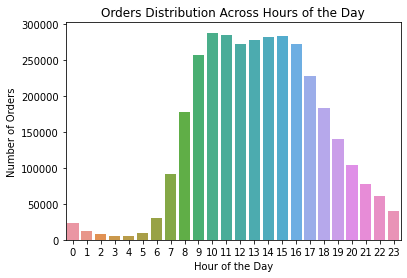

In [2]:
# Create a countplot using seaborn to visualize the distribution of orders across different hours of the day
# The 'x' parameter specifies the column from the 'orders' dataset to plot (in this case, the 'order_hour_of_day' column)
# The 'data' parameter specifies the dataset to use for the plot (in this case, the 'orders' dataset)
sns.countplot(x='order_hour_of_day', data=orders)

# Set the title of the plot
plt.title('Orders Distribution Across Hours of the Day')

# Set the label for the x-axis
plt.xlabel('Hour of the Day')

# Set the label for the y-axis
plt.ylabel('Number of Orders')

# Display the plot
plt.show()


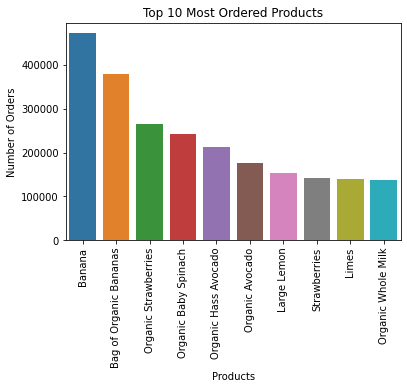

In [3]:
# Merge the 'order_products_prior' DataFrame with 'products' DataFrame on the 'product_id' column, using a 'left' join and assign it to 'merged_data'
merged_data = order_products_prior.merge(products, on='product_id', how='left')

# Count the occurrences of each unique value in the 'product_name' column of 'merged_data' DataFrame and select the top 10 most frequently ordered products, assign it to 'product_counts'
product_counts = merged_data['product_name'].value_counts().head(10)

# Create a bar plot using seaborn library, setting the x-axis values as the index of 'product_counts', and the y-axis values as the values of 'product_counts'
sns.barplot(x=product_counts.index, y=product_counts.values)

# Set the title of the plot as 'Top 10 Most Ordered Products'
plt.title('Top 10 Most Ordered Products')

# Set the label for the x-axis as 'Products'
plt.xlabel('Products')

# Set the label for the y-axis as 'Number of Orders'
plt.ylabel('Number of Orders')

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

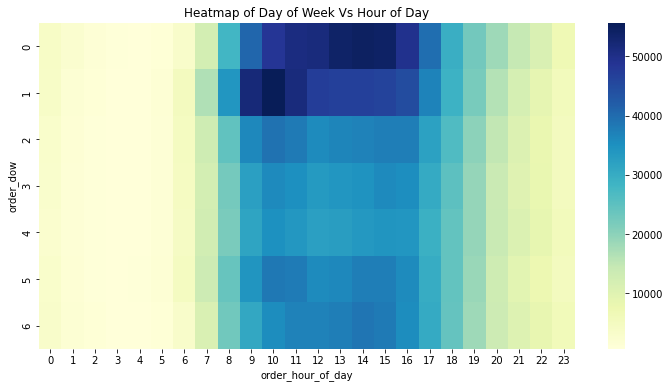

In [4]:
# Grouping the orders by "order_dow" (day of the week) and "order_hour_of_day"
grouped_orders = orders.groupby(["order_dow", "order_hour_of_day"])["order_id"].aggregate("count").reset_index()

# Creating a pivot table with "order_dow" as rows, "order_hour_of_day" as columns, and "order_id" as values
pivot_orders = grouped_orders.pivot(index='order_dow', columns='order_hour_of_day', values='order_id')

# Creating a figure with dimensions 12x6
plt.figure(figsize=(12,6))

# Creating a heatmap using the pivot table data, color map is set to "YlGnBu"
sns.heatmap(pivot_orders, cmap="YlGnBu")

# Setting the title of the plot
plt.title('Heatmap of Day of Week Vs Hour of Day')

# Displaying the plot
plt.show()

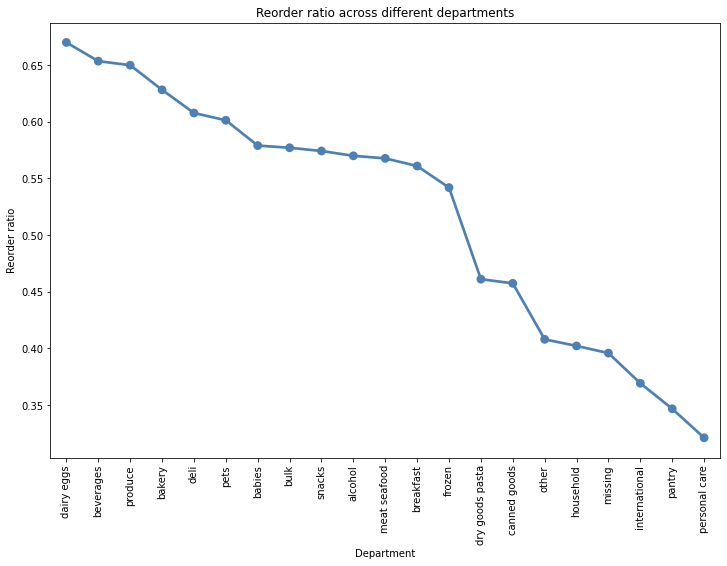

In [5]:
# Merging the 'order_products_prior' dataframe with the 'products' dataframe on the 'product_id' column 
# and then merging the result with the 'departments' dataframe on the 'department_id' column.
merged_data = order_products_prior.merge(products, on='product_id', how='left').merge(departments, on='department_id', how='left')

# Grouping by 'department' and calculating mean for the 'reordered' column.
grouped = merged_data.groupby("department")["reordered"].mean().reset_index()

# Sorting the 'grouped' dataframe by the 'reordered' column in descending order.
grouped = grouped.sort_values(by='reordered', ascending=False)

# Creating a figure with dimensions 12x8 inches
plt.figure(figsize=(12,8))

# Defining a color for the plot
color = (0.3, 0.5, 0.7, 0.8)

# Creating a point plot using the 'department' values as x-axis and the 'reordered' values as y-axis, with the specified color
sns.pointplot(x=grouped['department'].values, y=grouped['reordered'].values, color=color)

# Setting the label for the y-axis
plt.ylabel('Reorder ratio')

# Setting the label for the x-axis
plt.xlabel('Department')

# Setting the title of the plot
plt.title('Reorder ratio across different departments')

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()